In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
train = pd.read_csv('../input/train_V2.csv')

In [6]:
train.shape

(4446966, 29)

In [7]:
train.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints',
       'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'], dtype=object)

In [8]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [9]:
train=train.dropna()

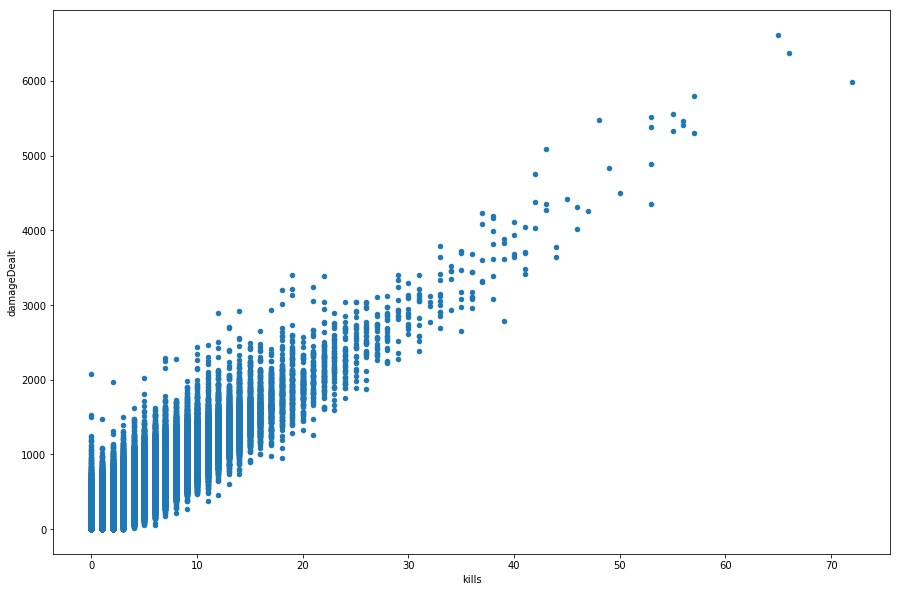

In [10]:
train.plot(x="kills",y="damageDealt", kind="scatter",figsize=(15,10))

Text(0.5, 0, 'Shots')

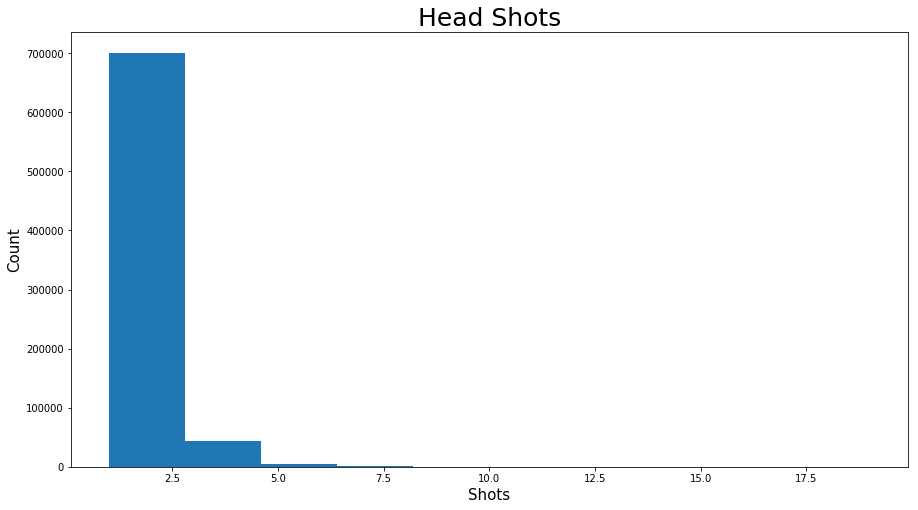

In [11]:
head_shots=train.query('headshotKills>0 & headshotKills<20')
plt.figure(figsize=(15, 8))
plt.hist(head_shots['headshotKills'])
plt.title("Head Shots",fontsize=25)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Shots",fontsize=15)



Text(0.5, 0, 'Shots')

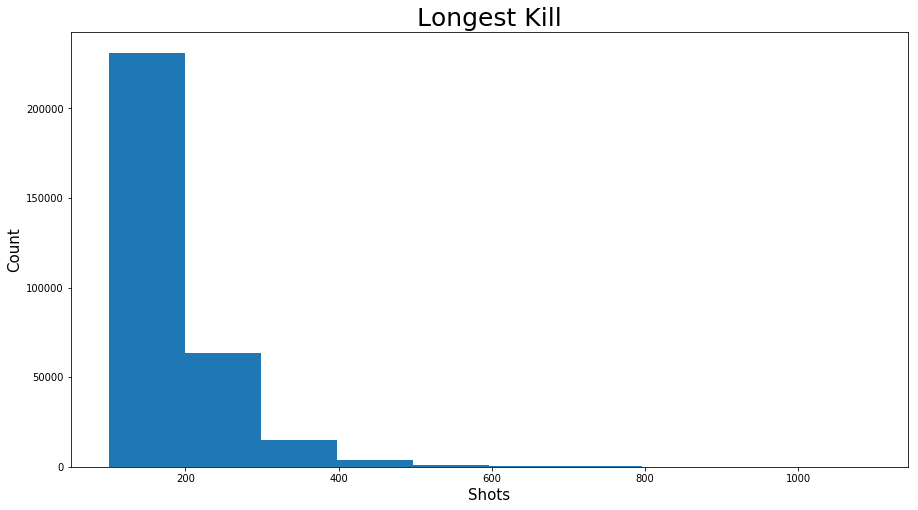

In [12]:
longest_kills=train[train["longestKill"]>100]
plt.figure(figsize=(15, 8))
plt.hist(longest_kills["longestKill"])
plt.title("Longest Kill",fontsize=25)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Shots",fontsize=15)

Text(0.5, 0, 'time per minuate')

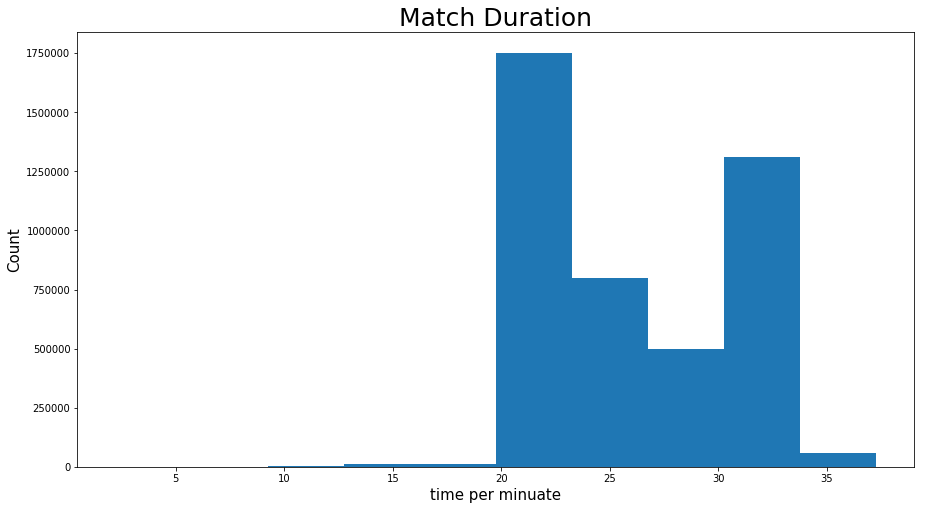

In [13]:
plt.figure(figsize=(15, 8))
plt.hist(train["matchDuration"]/60,)
plt.title("Match Duration",fontsize=25)
plt.ylabel("Count",fontsize=15)
plt.xlabel("time per minuate",fontsize=15)

Text(0.5, 0, 'Distance')

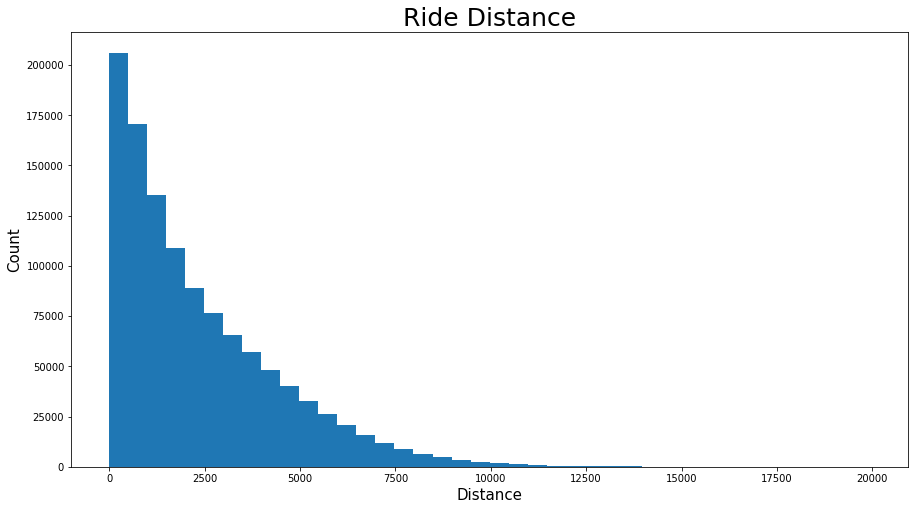

In [14]:
ride = train.query('rideDistance >0 & rideDistance <20000')
plt.figure(figsize=(15, 8))
plt.hist(ride['rideDistance'],bins=40)
plt.title("Ride Distance",fontsize=25)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Distance",fontsize=15)

Text(0.5, 0, 'Distance')

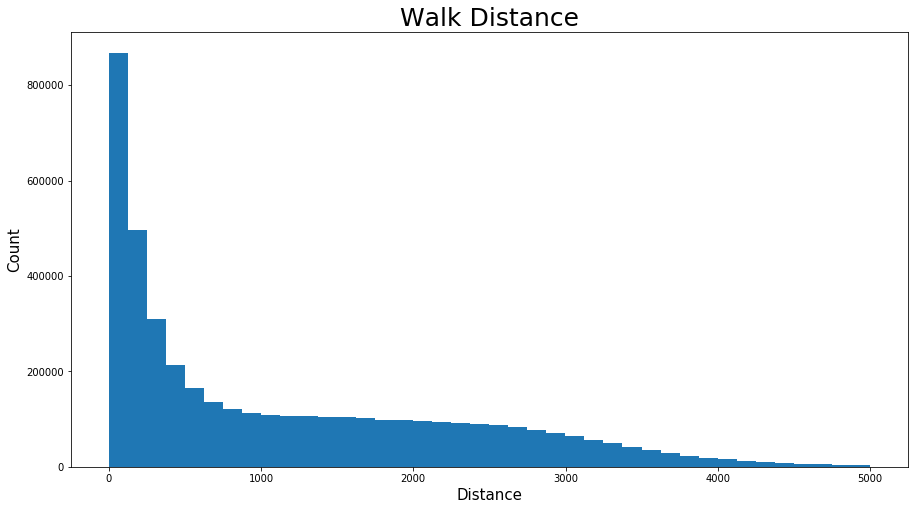

In [15]:
walk=train.query('walkDistance>0 & walkDistance<5000')
plt.figure(figsize=(15, 8))
plt.hist(walk['walkDistance'],bins=40)
plt.title("Walk Distance",fontsize=25)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Distance",fontsize=15)

Text(0.5, 0, 'Type')

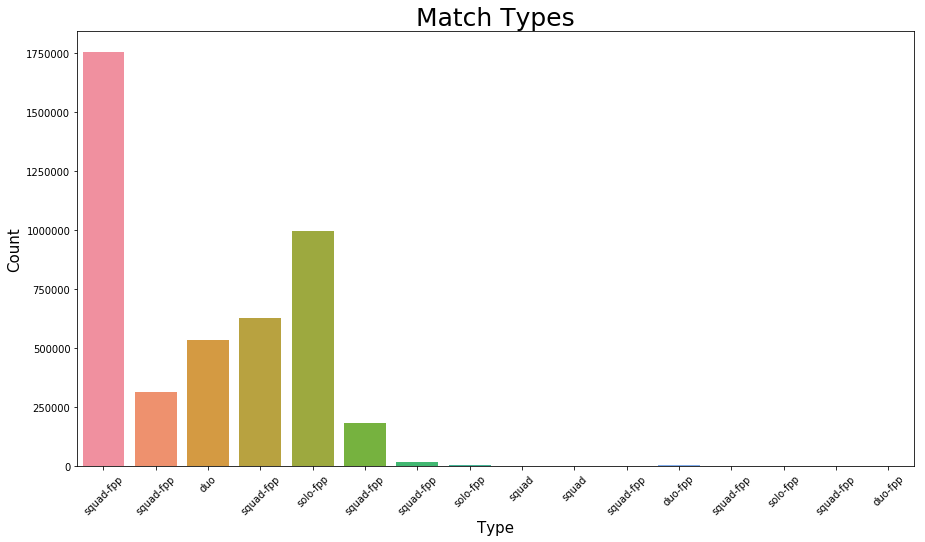

In [16]:
plt.figure(figsize=(15, 8))
f=sns.countplot(train["matchType"], saturation = 0.86,
              linewidth=2,
              edgecolor = sns.set_palette("dark", 3))
f.set_xticklabels(train["matchType"],rotation=45)
plt.title("Match Types",fontsize=25)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Type",fontsize=15)




In [17]:
cols=train.columns
aggs = ['count','min','mean','max']
grp = train.loc[train['matchType'].str.contains('solo')].groupby('matchId')
grpSolo = grp[cols].sum()
grp = train.loc[train['matchType'].str.contains('duo')].groupby('matchId')
grpDuo = grp[cols].sum()
grp=train.loc[train['matchType'].str.contains('squad')].groupby('matchId')
grpTeam=grp[cols].sum()
pd.concat([grpSolo.describe().T[aggs],grpDuo.describe().T[aggs], grpTeam.describe().T[aggs]], keys=['solo', 'duo', 'team'], axis=1)

solo            ...                team             
                  count    min     ...                mean          max
assists          8094.0    0.0     ...           27.609731     275.0000
boosts           8094.0    0.0     ...          105.718955     227.0000
damageDealt      8094.0  100.0     ...        12553.826240   68960.3400
DBNOs            8094.0    0.0     ...           81.867229     669.0000
headshotKills    8094.0    0.0     ...           20.859458     217.0000
heals            8094.0    0.0     ...          140.217784     424.0000
killPlace        8094.0    3.0     ...         4472.897220    5056.0000
killPoints       8094.0    0.0     ...        50615.437480  142832.0000
kills            8094.0    0.0     ...           86.301703     687.0000
killStreaks      8094.0    0.0     ...           52.001835     167.0000
longestKill      8094.0    0.0     ...         2230.637463    8039.2400
matchDuration    8094.0  266.0     ...       146790.938535  221800.0000
maxPlace         8094.0    4.0     ...         2623.409872    3552.0000
numGroups        8094.0    4.0     ...         2534.963996    3552.0000
rankPoints       8094.0 -100.0     ...        79939.507693  156602.0000
revives          8094.0    0.0     ...           20.348836      81.0000
rideDistance     8094.0    0.0     ...        60673.269816  370542.2000
roadKills        8094.0    0.0     ...            0.246720      13.0000
swimDistance     8094.0    0.0     ...          415.612261    9829.9610
teamKills        8094.0    0.0     ...            2.717120      76.0000
vehicleDestroys  8094.0    0.0     ...            0.864847      12.0000
walkDistance     8094.0    0.0     ...       116091.455010  216150.8700
weaponsAcquired  8094.0    4.0     ...          347.782216    1666.0000
winPoints        8094.0    0.0     ...        59257.160106  154845.0000
winPlacePerc     8094.0    0.0     ...           43.277213      54.1334

[25 rows x 12 columns]

Text(0, 0.5, 'Number')

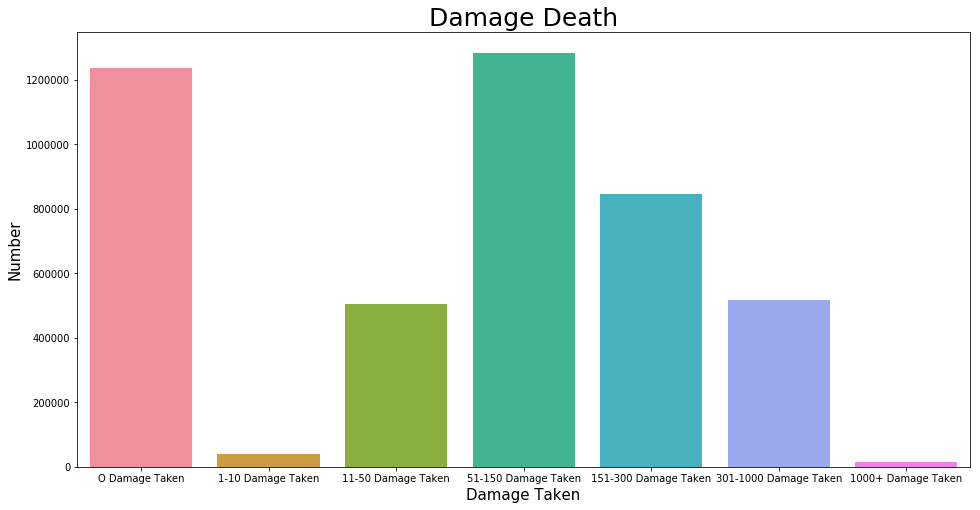

In [18]:
CategoryDamageDealt = pd.cut(train['damageDealt'], [-1, 0, 10, 50, 150, 300, 1000, 6000],
      labels = ['O Damage Taken', 
                '1-10 Damage Taken', 
                '11-50 Damage Taken', 
                '51-150 Damage Taken',
                '151-300 Damage Taken',
                '301-1000 Damage Taken',
                '1000+ Damage Taken'])
plt.figure(figsize=(16, 8))
sns.countplot(CategoryDamageDealt, saturation = 0.86,
              linewidth=2,
              edgecolor = sns.set_palette("dark", 3))
plt.title("Damage Death",fontsize=25)
plt.xlabel("Damage Taken",fontsize=15)
plt.ylabel("Number",fontsize=15)

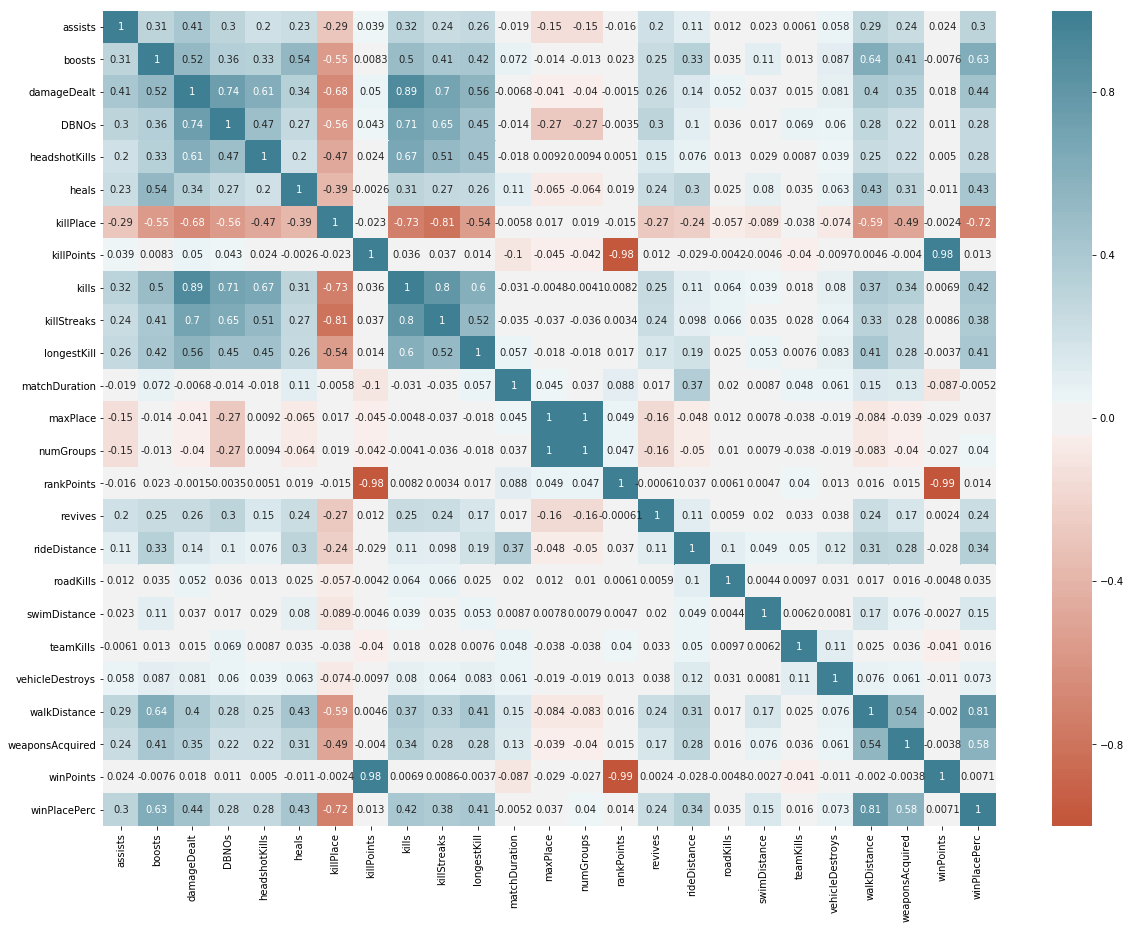

In [19]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(), 

    vmin=-1, vmax=1, center=0,

    cmap=sns.diverging_palette(20, 220, n=200),

    annot=True,

)

In [20]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
target_data=train.drop(train.columns[[0, 1, 2,15]], axis=1)

In [23]:
X = target_data.drop('winPlacePerc', 1)
y = target_data['winPlacePerc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
predictions = lm.predict(X_test)

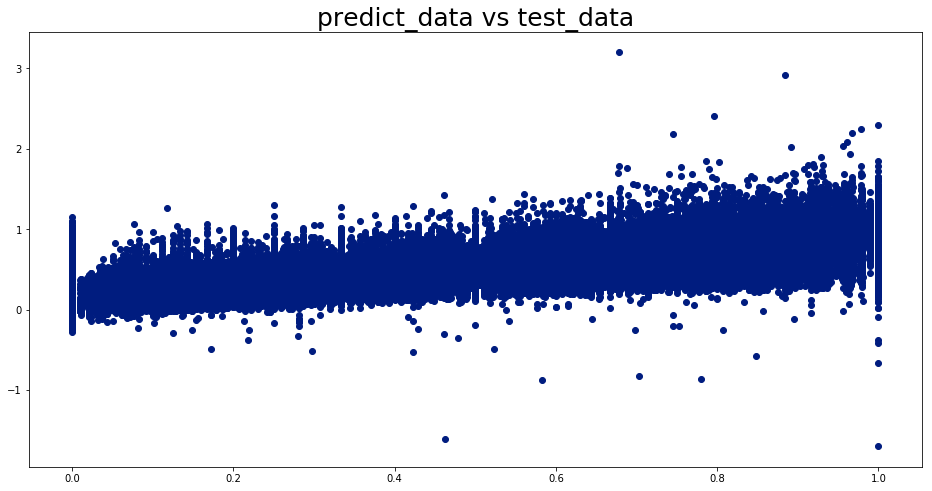

In [26]:
plt.figure(figsize=(16, 8))
plt.title("predict_data vs test_data",fontsize=25)
plt.scatter(y_test,predictions)

In [27]:
model = LinearRegression(normalize=True, n_jobs=8)

lreg = model.fit(X_train, y_train)

In [28]:
train_score=lreg.score(X_train, y_train)
print(train_score)

0.8306890421868269


In [29]:
test_score=lreg.score(X_test,y_test)
print(test_score)

0.8299442978845305
